# import 

In [681]:
# import
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)# to show all columns in output
pd.set_option('display.max_rows', None)# to show all rows

# load data

In [682]:

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')


In [683]:
rename_train  = train.columns
rename_test =  test.columns
train.columns = [name.replace(' ', '_') if ' ' in name else name for name in rename_train  ]
test.columns = [name.replace(' ', '_') if ' ' in name else name for name in rename_test ]

In [684]:
for a in range(len(rename_train)):
    try:
        train[rename_train].astype('float64')
    except:
        continue 

for a in range(len(rename_test)):
    try:
        test_data[rename_test].astype('float64')
    except:
        continue 

In [685]:
train['Pool_QC'].fillna('No Pool', inplace=True) 
train['Misc_Feature'].fillna('Na', inplace=True) 
train['Alley'].fillna('No alley access', inplace=True) 
train['Fence'].fillna('No Fence', inplace=True) 
train['Fireplaces'].fillna('No Fireplace', inplace=True) 
train['Garage_Cond'].fillna('No Garage cond', inplace=True) 
train['Garage_Qual'].fillna('No Garage qual', inplace=True)

In [686]:
test['Pool_QC'].fillna('No Pool', inplace=True) 
test['Misc_Feature'].fillna('Na', inplace=True) 
test['Alley'].fillna('No alley access', inplace=True) 
test['Fence'].fillna('No Fence', inplace=True) 
test['Fireplaces'].fillna('No Fireplace', inplace=True) 
test['Garage_Cond'].fillna('No Garage cond', inplace=True) 
test['Garage_Qual'].fillna('No Garage qual', inplace=True)

In [687]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [688]:
print(train.isnull().sum().value_counts())
print(test.isnull().sum().value_counts())

0    82
dtype: int64
0    80
dtype: int64


## cut the data to make it easier

In [689]:
outside_house=train.loc[:, ['MS_SubClass','MS_Zoning','Lot_Frontage','Street','Alley',
              'Lot_Shape', 'Land_Contour',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2','SalePrice']]

In [690]:
inside_house=train.loc[:, ['SalePrice','Bldg_Type','House_Style','Year_Built', 'Year_Remod/Add','Garage_Yr_Blt']]


In [691]:
more_side_house=train.loc[:, ['Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Foundation', 'Functional', 'Garage_Type', 'Garage_Finish', 'Garage_Cars',
         'Garage_Finish','Paved_Drive','Misc_Feature', 'Misc_Val','SalePrice' ]]

In [692]:
system_house=train.loc[:, ['Heating','saleprice','Central_Air', 'Electrical' ,'SalePrice']]

C:\Users\mno15\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [693]:
area_inside_house=train.loc[:, ['Low_Qual_Fin_SF','Gr_Liv_Area'
       'Garage_Cars', '1st_Flr_SF',
       '2nd_Flr_SF', 'Wood_Deck_SF' ,'Open_Porch_SF','Enclosed_Porch', '3Ssn_Porch',
                                'Screen_Porch', 'Pool_Area', 'Lot_Area', 'Mas_Vnr_Area','SalePrice']]

In [694]:
count_house=train.loc[:, ['Bsmt_Full_Bath','Bsmt_Half_Bath', 'Full_Bath',
                            'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'TotRms_AbvGrd','Fireplace_Qu','SalePrice']]

In [695]:
rate_house=train.loc[:, ['Kitchen_Qual','Fireplace_Qu', 'Garage_Qual',
                            'Pool_QC', 'Fence',
       'Overall_Cond', 'Overall_Qual','Exter_Qual',
                         'Bsmt_Qual','BsmtFin_Type_1','BsmtFin_Type_2','Heating_QC','SalePrice']]

In [696]:
after_sale_house=train.loc[:, ['Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type',
       'Sale_Condition', 'Misc_Val','Garage_Cars','SalePrice']]

# look at the corr

In [697]:
corr = train.corr()

In [698]:
corr_SalePrice = np.abs(train.corr()['SalePrice']).sort_values(ascending=False)[:10]
corr_SalePrice

SalePrice         1.000000
Overall_Qual      0.800207
Gr_Liv_Area       0.697038
Garage_Area       0.649897
Garage_Cars       0.647781
Total_Bsmt_SF     0.629303
1st_Flr_SF        0.618486
Year_Built        0.571849
Year_Remod/Add    0.550370
Full_Bath         0.537969
Name: SalePrice, dtype: float64

## outside_house

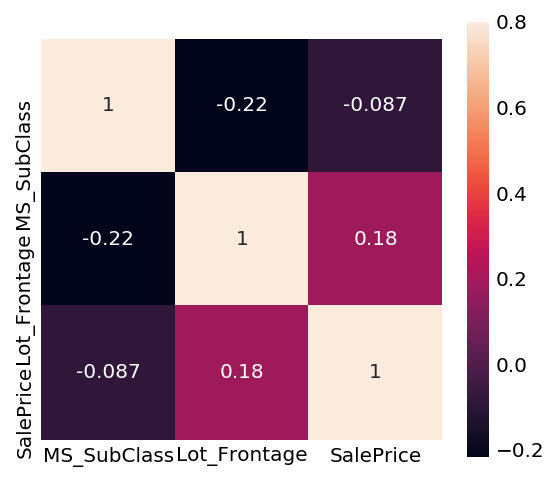

In [699]:
corr_outside_house = outside_house.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corr_outside_house, vmax=.8, square=True, annot=True);

## inside_house

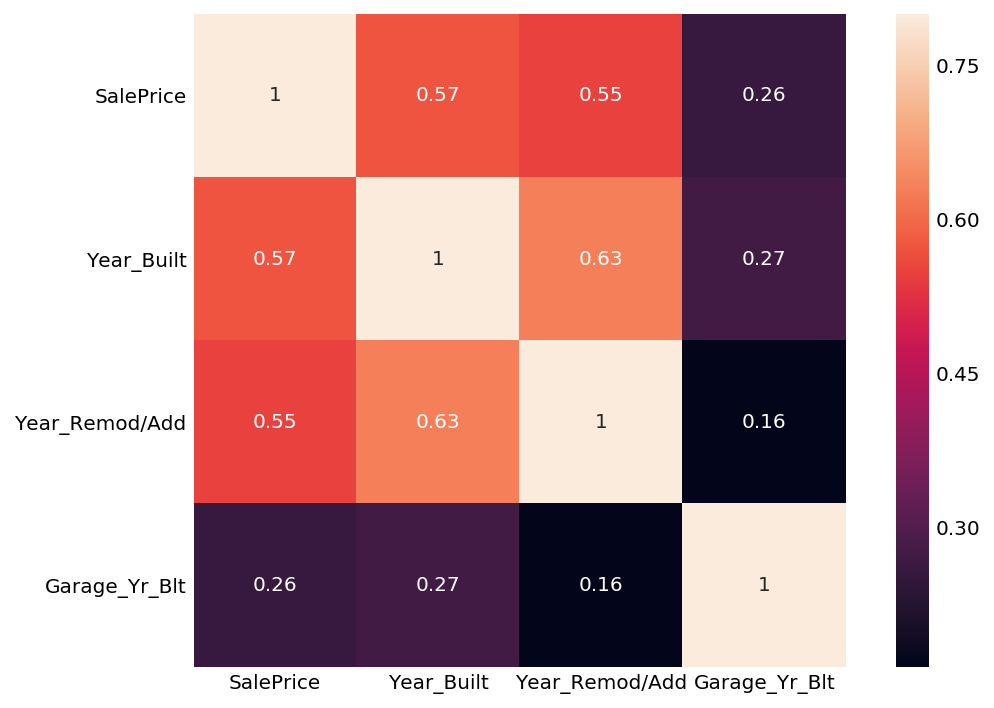

In [700]:
corr_inside_house = inside_house.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_inside_house, vmax=.8, square=True, annot=True);

In [701]:
inside_house.columns

Index(['SalePrice', 'Bldg_Type', 'House_Style', 'Year_Built', 'Year_Remod/Add',
       'Garage_Yr_Blt'],
      dtype='object')

C:\Users\mno15\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


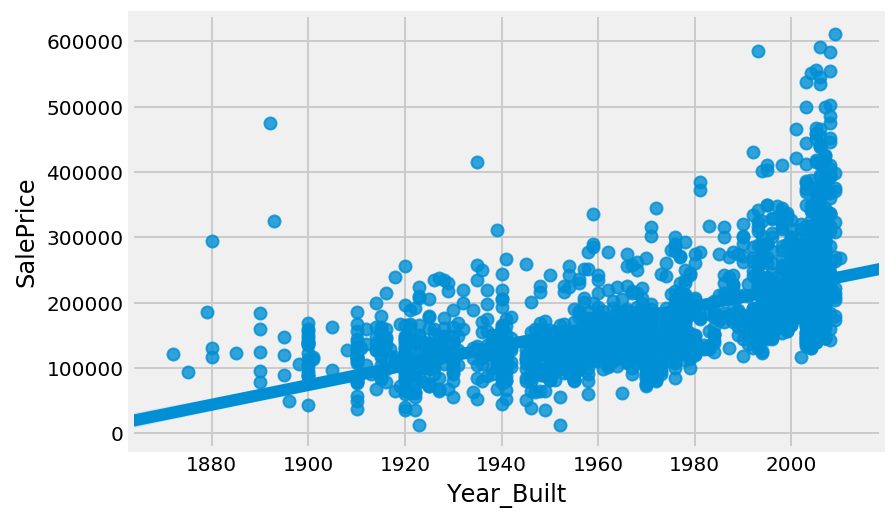

In [702]:
sns.regplot(inside_house.Year_Built, inside_house.SalePrice);

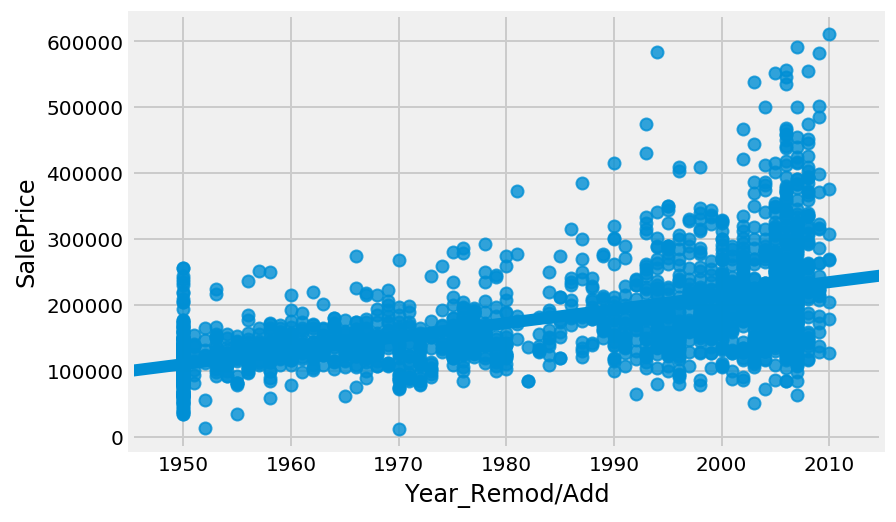

In [703]:
sns.regplot(inside_house['Year_Remod/Add'], inside_house.SalePrice);

## more_side_house

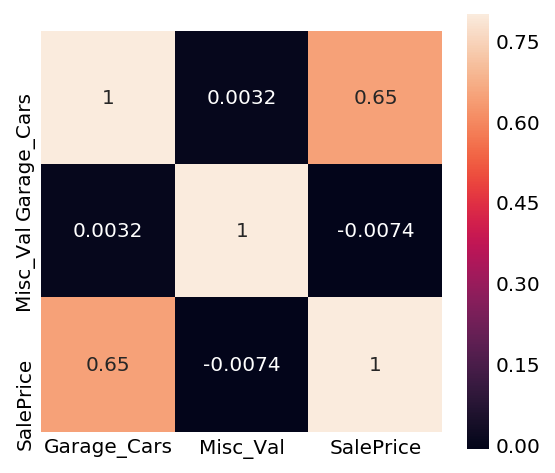

In [704]:
corr_more_side_house = more_side_house.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corr_more_side_house, vmax=.8, square=True, annot=True);

In [705]:
more_side_house.columns

Index(['Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd',
       'Mas_Vnr_Type', 'Foundation', 'Functional', 'Garage_Type',
       'Garage_Finish', 'Garage_Cars', 'Garage_Finish', 'Paved_Drive',
       'Misc_Feature', 'Misc_Val', 'SalePrice'],
      dtype='object')

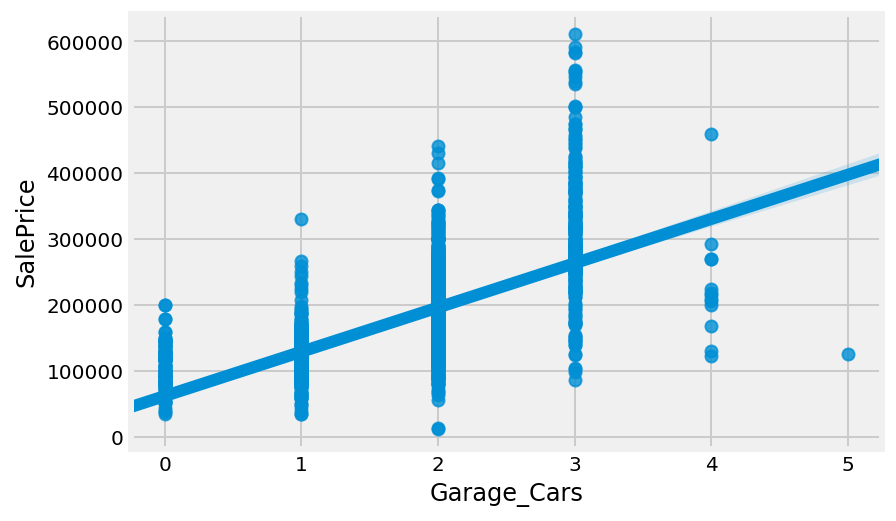

In [706]:
sns.regplot(more_side_house.Garage_Cars, more_side_house.SalePrice);

In [707]:
mask = (more_side_house.Garage_Cars > 5)
index_data = more_side_house[mask]

In [708]:
more_side_house.drop(index_data.index, inplace=True,  axis=0)

C:\Users\mno15\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


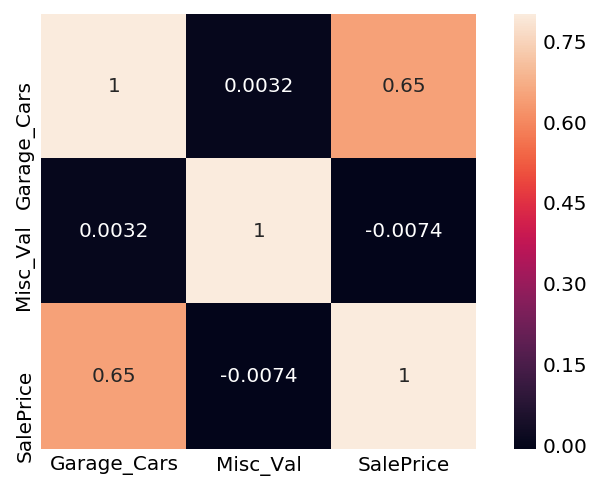

In [709]:
sns.heatmap(corr_more_side_house, vmax=.8, square=True, annot=True);

## system_house

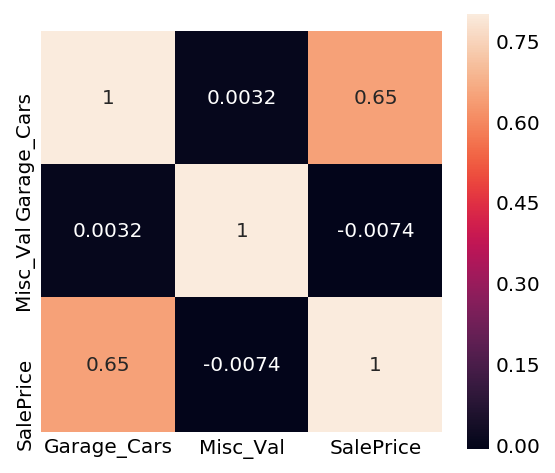

In [710]:
corr_system_house = system_house.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corr_more_side_house, vmax=.8, square=True, annot=True);

#### Its the same as more_side_house so we will pass it !

# corr_count_house

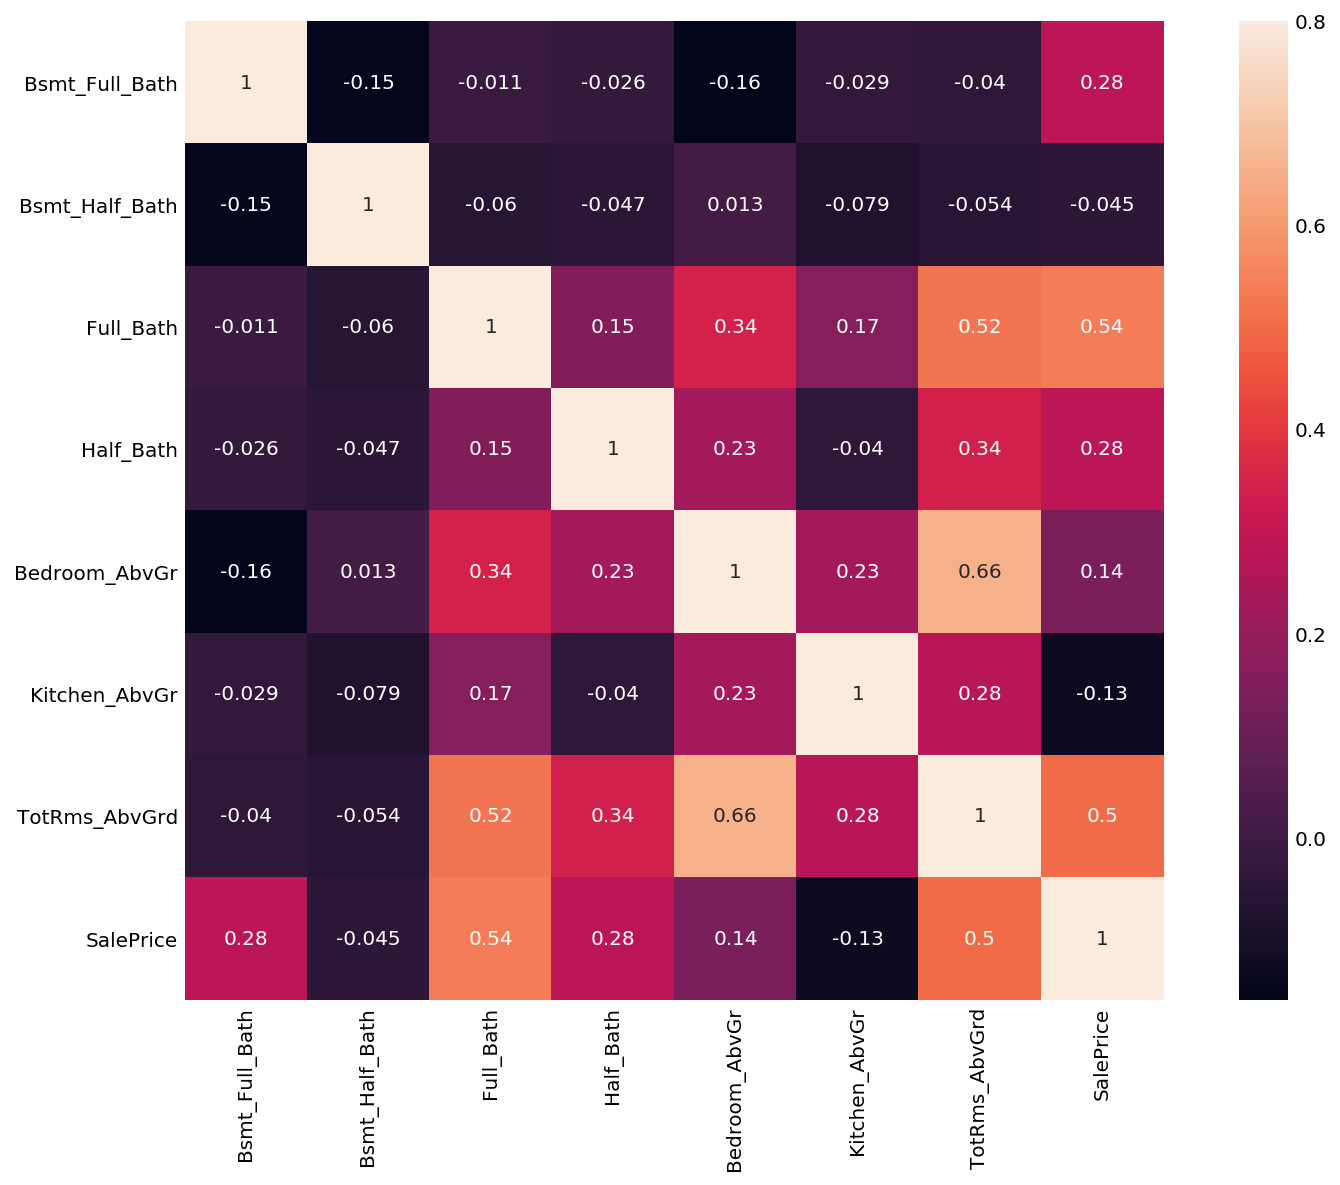

In [711]:
corr_count_house = count_house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_count_house, vmax=.8, square=True, annot=True);

In [712]:
count_house.columns

Index(['Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplace_Qu',
       'SalePrice'],
      dtype='object')

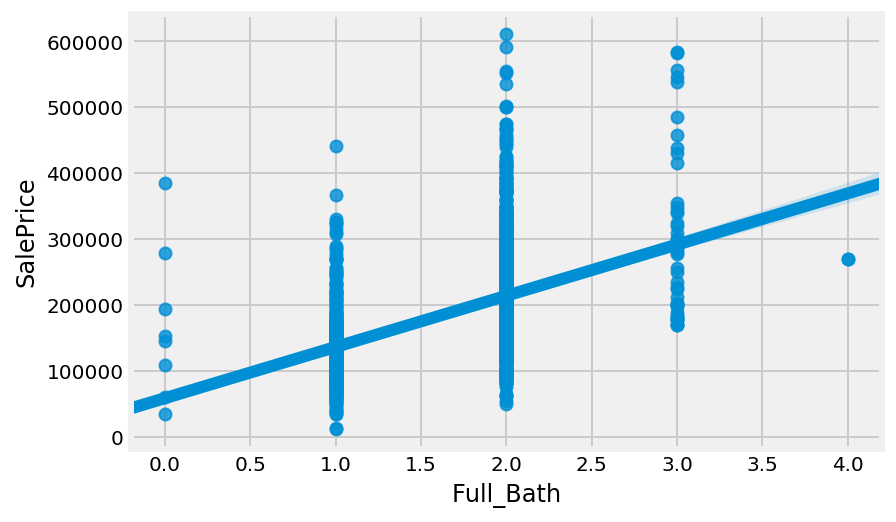

In [713]:
sns.regplot(count_house.Full_Bath, count_house.SalePrice);

# corr_area_inside_house 

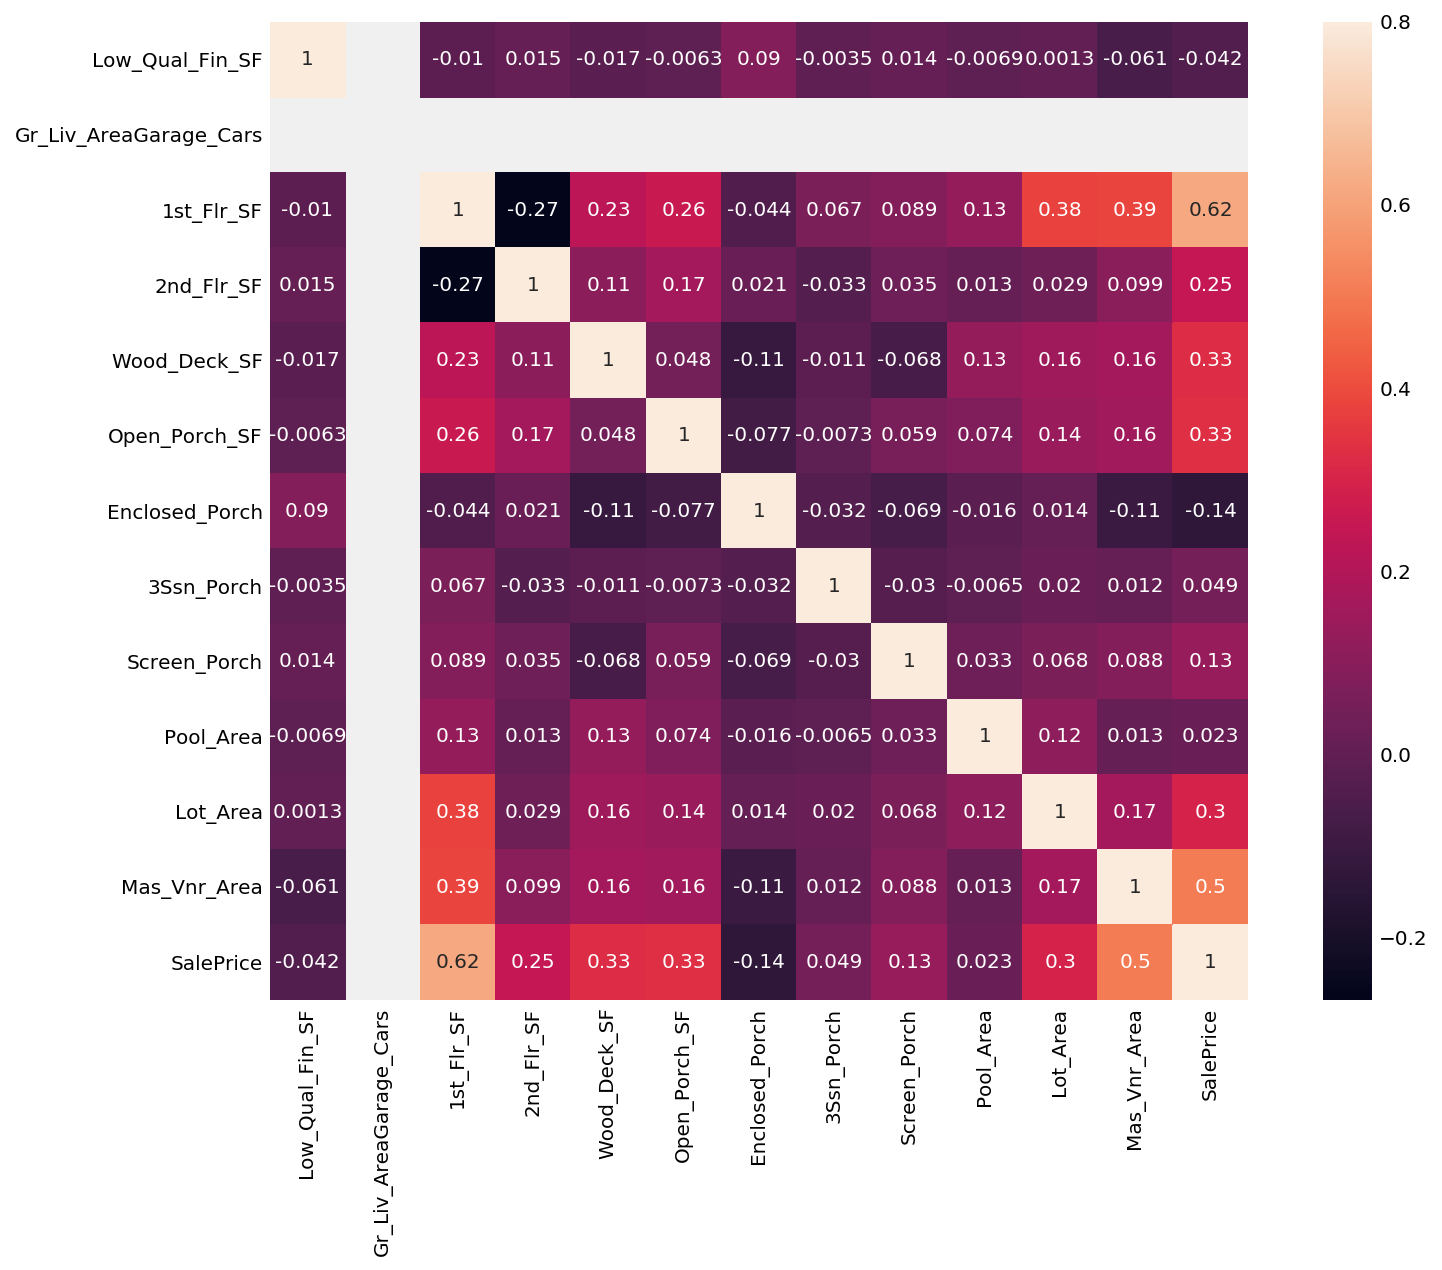

In [714]:
corr_area_inside_house = area_inside_house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_area_inside_house, vmax=.8, square=True, annot=True);

In [715]:
area_inside_house.columns

Index(['Low_Qual_Fin_SF', 'Gr_Liv_AreaGarage_Cars', '1st_Flr_SF', '2nd_Flr_SF',
       'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch',
       'Screen_Porch', 'Pool_Area', 'Lot_Area', 'Mas_Vnr_Area', 'SalePrice'],
      dtype='object')

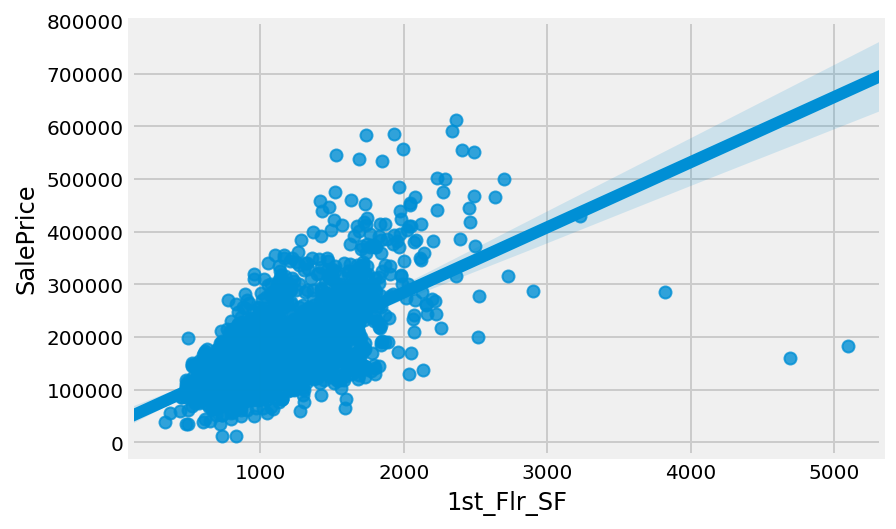

In [716]:
sns.regplot(area_inside_house['1st_Flr_SF'], area_inside_house.SalePrice);

In [717]:
area_inside_house = area_inside_house.drop(area_inside_house[(area_inside_house['1st_Flr_SF']>3000) & (area_inside_house['SalePrice']<200000)].index)

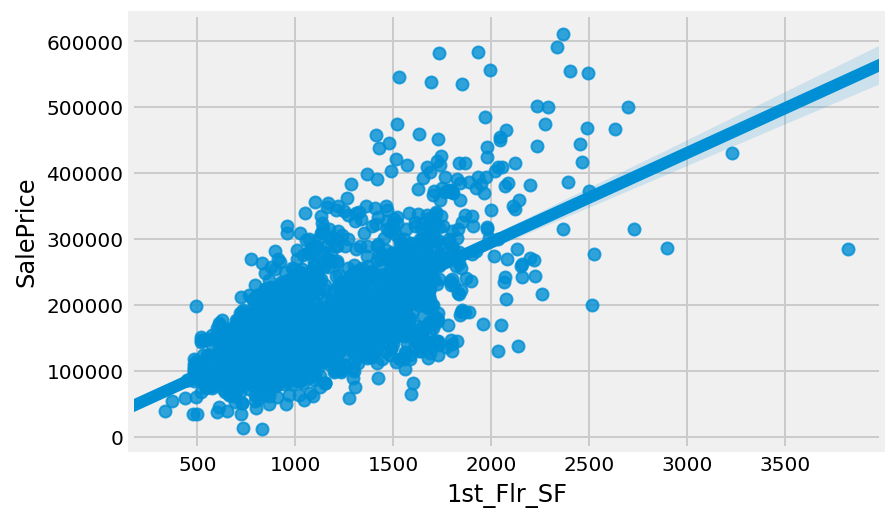

In [718]:
sns.regplot(area_inside_house['1st_Flr_SF'], area_inside_house.SalePrice);

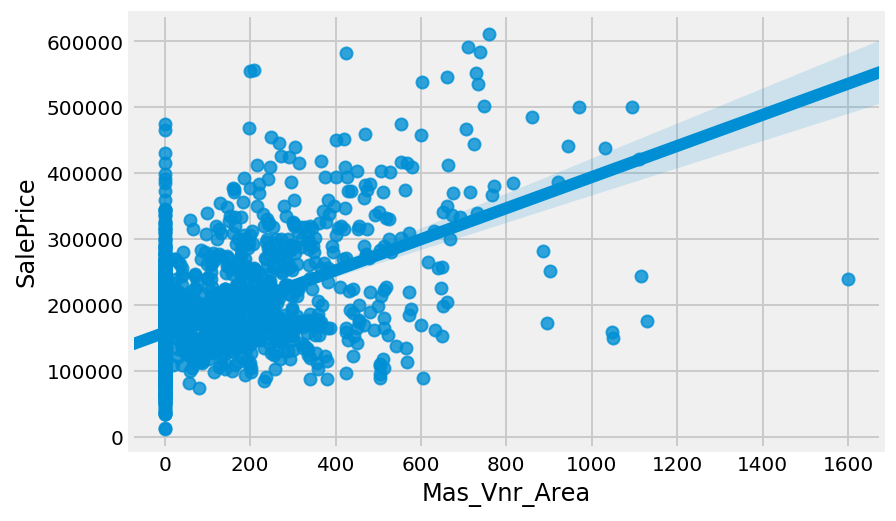

In [719]:
sns.regplot(area_inside_house['Mas_Vnr_Area'], area_inside_house.SalePrice);

In [720]:
area_inside_house = area_inside_house.drop(area_inside_house[(area_inside_house['Mas_Vnr_Area']>1250)].index)

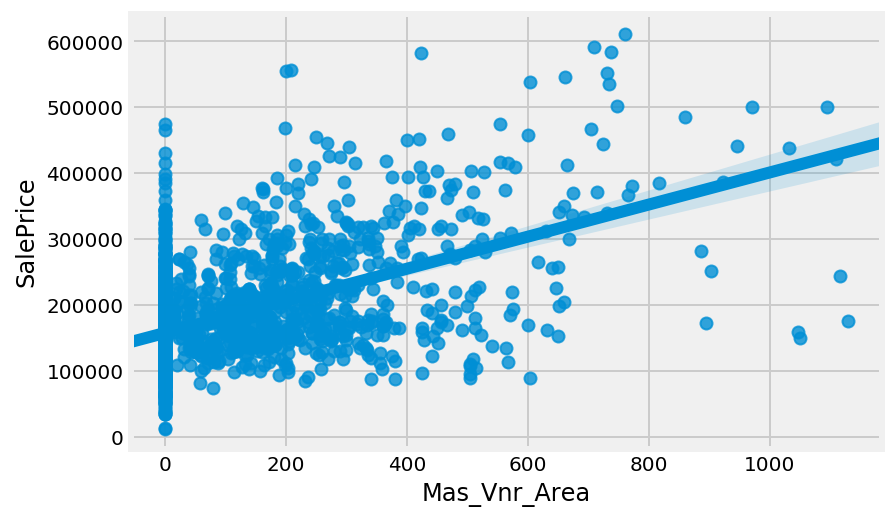

In [721]:
sns.regplot(area_inside_house['Mas_Vnr_Area'], area_inside_house.SalePrice);

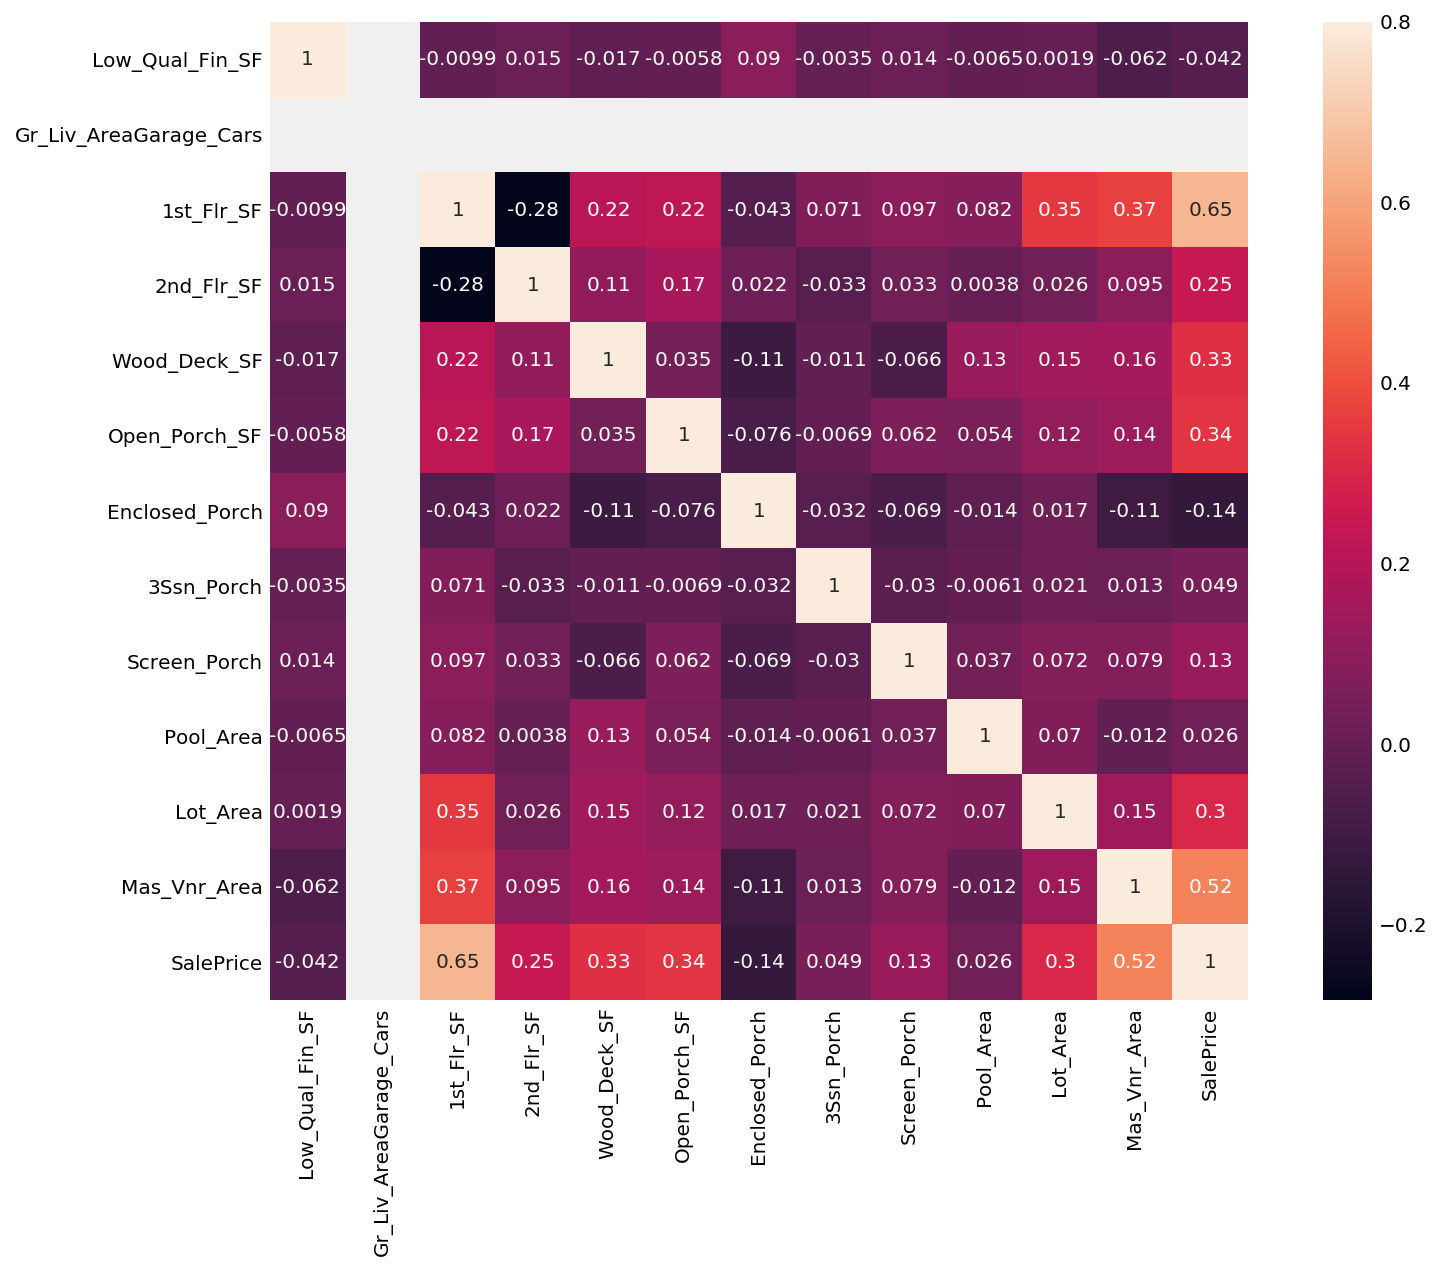

In [722]:
corr_area_inside_house = area_inside_house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_area_inside_house, vmax=.8, square=True, annot=True);

# rate_house 

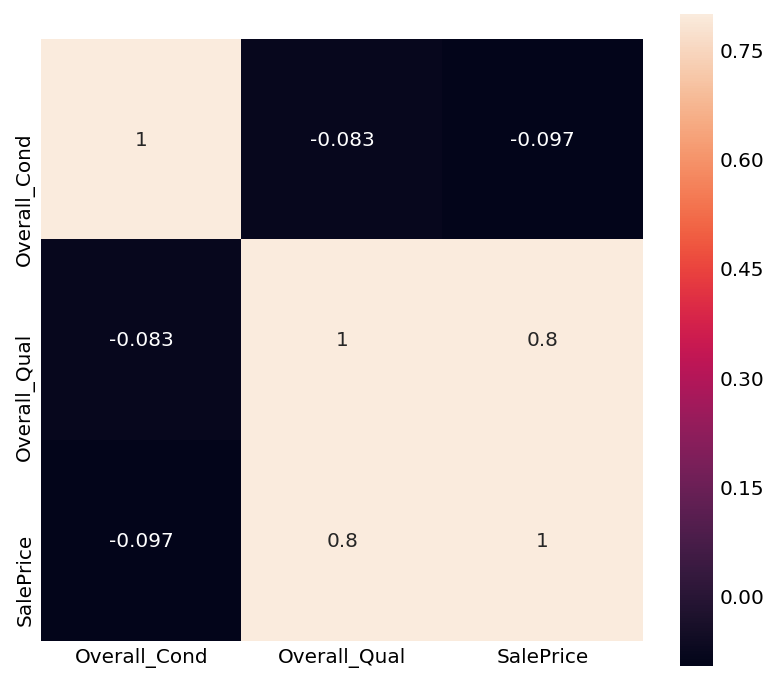

In [723]:
corr_rate_house = rate_house.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_rate_house, vmax=.8, square=True, annot=True);

In [724]:
rate_house.columns

Index(['Kitchen_Qual', 'Fireplace_Qu', 'Garage_Qual', 'Pool_QC', 'Fence',
       'Overall_Cond', 'Overall_Qual', 'Exter_Qual', 'Bsmt_Qual',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating_QC', 'SalePrice'],
      dtype='object')

In [725]:
rate_house['Overall_Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall_Qual, dtype: int64

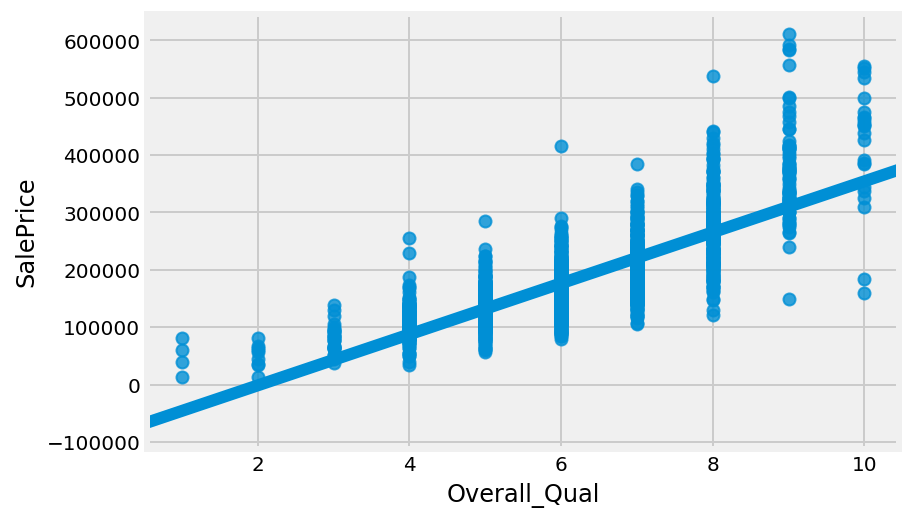

In [726]:
sns.regplot(rate_house['Overall_Qual'], after_sale_house.SalePrice);

In [727]:
rate_house = rate_house.drop(rate_house[(rate_house['Overall_Qual']<1) ].index)

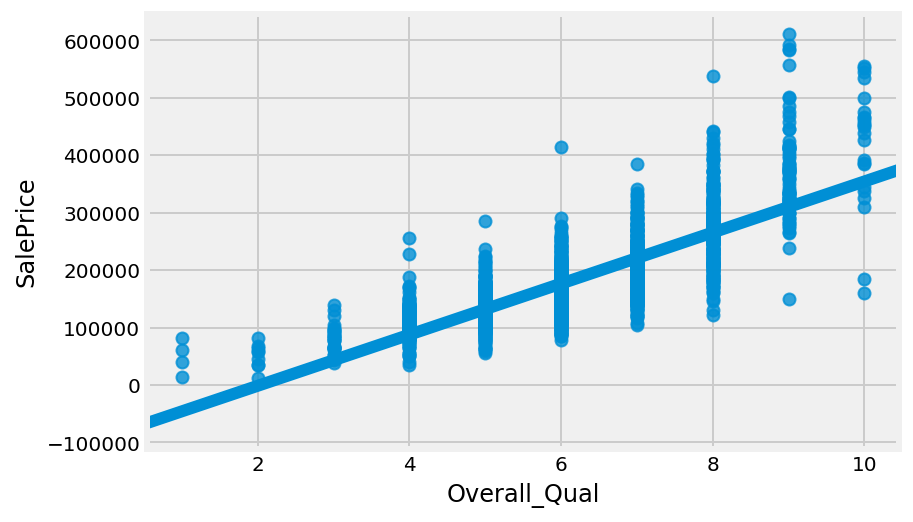

In [728]:
sns.regplot(rate_house['Overall_Qual'], after_sale_house.SalePrice);

# after_sale_house

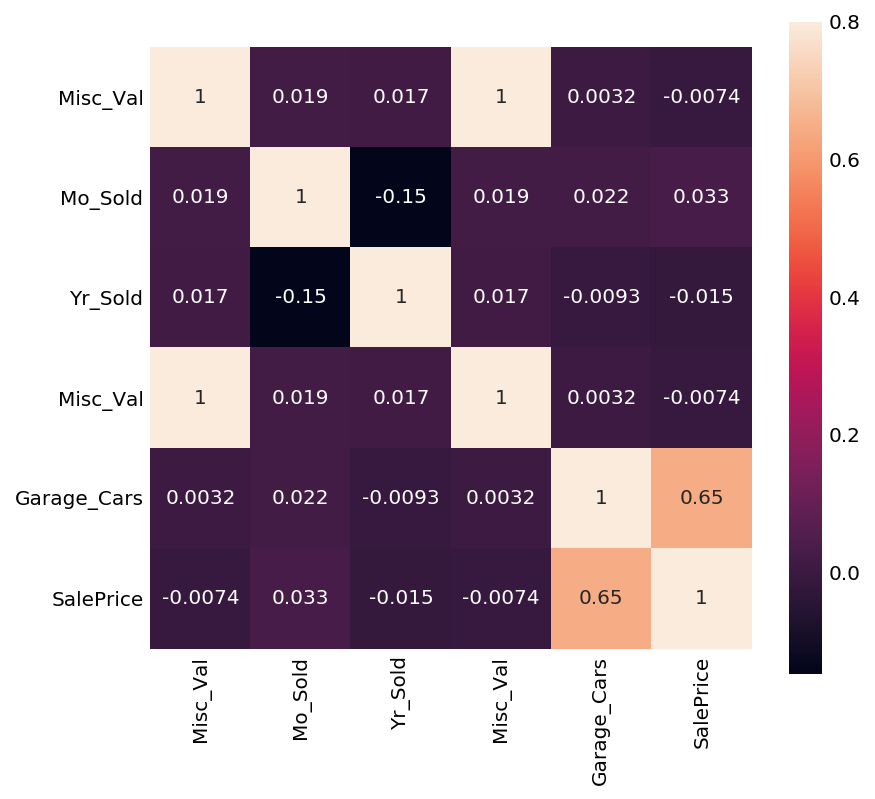

In [729]:
corr_after_sale_house = after_sale_house.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_after_sale_house, vmax=.8, square=True, annot=True);

In [730]:
after_sale_house.columns

Index(['Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type', 'Sale_Condition',
       'Misc_Val', 'Garage_Cars', 'SalePrice'],
      dtype='object')

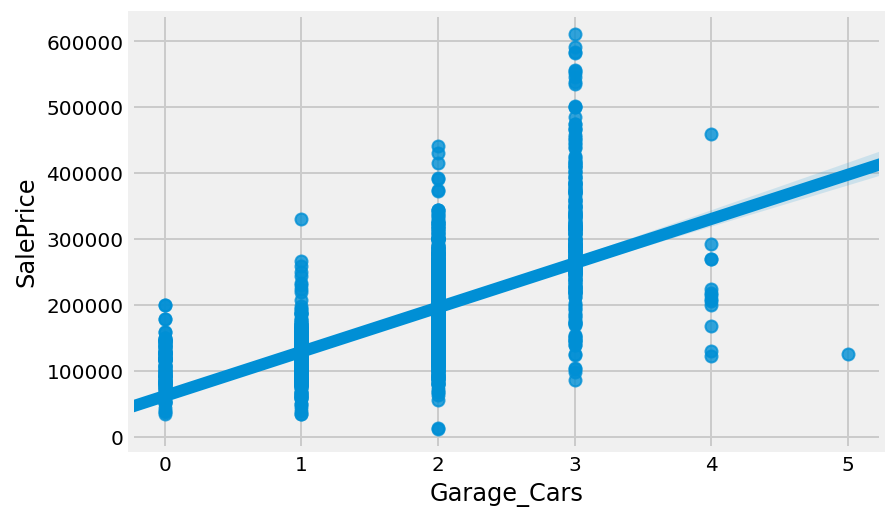

In [731]:
sns.regplot(after_sale_house['Garage_Cars'], after_sale_house.SalePrice);

## Encoded Sale Condition

In [732]:
EncodedSaleConditionDictionary = {'Abnorml': 1, 'Normal': 0, 'Partial': 0, 'Family' : 0, 'Alloca' : 0, 'AdjLand' : 0}
train['Encoded_Sale_Condition'] = train['Sale_Condition'].map(EncodedSaleConditionDictionary)
Sale_condeition = train.pop('Sale_Condition')

### mask the outliers

In [733]:
train = train.drop(train[(train['1st_Flr_SF']>3000) & (train['SalePrice']<200000)].index)

In [734]:
mask = (train.Misc_Val > 3000)
index_data = train[mask]
index_data

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,Encoded_Sale_Condition
304,3,526351010,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,172000,0
380,2669,902406030,20,RM,65.0,9750,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1958,1958,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,960.0,960.0,GasA,Ex,Y,SBrkr,960,0,0,960,0.0,0.0,1,0,3,1,TA,5,Typ,0,0,Detchd,2002.0,Unf,2.0,624.0,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,Gar2,4500,7,2006,WD,125000,0
700,207,903454060,190,RM,70.0,5600,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,4,5,1930,1950,Hip,CompShg,VinylSd,Wd Shng,None,0.0,Fa,Fa,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,Fa,N,SBrkr,372,720,0,1092,0.0,0.0,2,0,3,2,Fa,7,Mod,0,0,0,0.0,0,0.0,0.0,No Garage qual,No Garage cond,N,0,0,0,0,0,0,No Pool,No Fence,Othr,3500,7,2010,WD,55000,0
765,1862,533352075,90,RL,0.0,18890,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,No Pool,No Fence,Gar2,8300,8,2007,WD,190000,0
1225,1263,535425060,20,RL,76.0,11355,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,7,1958,2001,Gable,Tar&Grv,HdBoard,HdBoard,BrkFace,125.0,TA,TA,CBlock,TA,TA,No,BLQ,637.0,Unf,0.0,675.0,1312.0,GasA,Ex,Y,SBrkr,1312,0,0,1312,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1958.0,RFn,2.0,495.0,TA,TA,Y,0,304,144,0,0,0,No Pool,MnPrv,Othr,6500,4,2008,WD,186000,0
1786,1443,907196040,60,RL,75.0,12192,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,663.0,Unf,0.0,265.0,928.0,GasA,Ex,Y,SBrkr,928,895,0,1823,1.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,2000.0,RFn,2.0,626.0,TA,TA,Y,192,36,0,0,0,0,No Pool,No Fence,Shed,4500,5,2008,WD,235000,0


In [735]:
train.drop(index_data.index, inplace=True,  axis=0)

In [736]:
train.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,Encoded_Sale_Condition
0,109,533352170,60,RL,0.0,13517,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No Pool,No Fence,Na,0,3,2010,WD,130500,0
1,544,531379050,60,RL,43.0,11492,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No Pool,No Fence,Na,0,4,2009,WD,220000,0
2,153,535304180,20,RL,68.0,7922,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,No Pool,No Fence,Na,0,1,2010,WD,109000,1
3,318,916386060,60,RL,73.0,9802,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,No Pool,No Fence,Na,0,4,2010,WD,174000,0
4,255,906425045,50,RL,82.0,14235,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,No Pool,No Fence,Na,0,3,2010,WD,138500,0


In [737]:
mask = (train.SalePrice > 500000)
index_data = train[mask]

In [738]:
train.drop(index_data.index, inplace=True,  axis=0)

In [739]:
mask = (train.Gr_Liv_Area > 5000)
index_data = train[mask]

In [740]:
train.drop(index_data.index, inplace=True,  axis=0)

In [741]:
mask = (train.Garage_Cars > 5)
index_data = train[mask]

In [742]:
train.drop(index_data.index, inplace=True,  axis=0)

In [743]:
train =train.drop(train[(train['Mas_Vnr_Area']>1250)].index)

In [486]:
# categories= ['Kitchen_Qual','Fireplace_Qu', 'Garage_Qual',
#                             'Pool_QC', 'Fence',
#        'Overall_Cond', 'Overall_Qual','Exter_Qual',
#                          'Bsmt_Qual','BsmtFin_Type_1','BsmtFin_Type_2','Heating_QC']
# categories_orde = pd.DataFrame()
# for a in range(len(categories)):
    
#     categories_orde[categories[a]], uniques =  pd.factorize(rate_house[categories[a]])

### concat the train and test to evenout the columns 

In [596]:
data = pd.concat([train, test], sort=False)

In [597]:
data_dummies = pd.get_dummies(data)

In [598]:
train_dummies = data_dummies[: len(train)]
test_dummies = data_dummies[len(train): ]

In [599]:
train_dummies.shape

(2031, 315)

In [600]:
test_dummies.shape

(879, 315)

In [601]:
test_dummies.drop('SalePrice', axis=1, inplace=True)

In [492]:
test_dummies.head()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,Encoded_Sale_Condition,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,Lot_Shape_IR1,Lot_Shape_IR2,Lot_Shape_IR3,Lot_Shape_Reg,Land_Contour_Bnk,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Land_Slope_Gtl,Land_Slope_Mod,Land_Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition_1_Artery,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Artery,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Condition_2_RRAn,Condition_2_RRNn,Bldg_Type_1Fam,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Roof_Matl_CompShg,Roof_Matl_Membran,Roof_Matl_Metal,Roof_Matl_Roll,Roof_Matl_Tar&Grv,Roof_Matl_WdShake,Roof_Matl_WdShngl,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_PreCast,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Other,Exterior_2nd_Plywood,Exterior_2nd_PreCast,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_0,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_CBlock,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Exter_Cond_Ex,Exter_Cond_Fa,Exter_Cond_Gd,Exter_Cond_Po,Exter_Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt_Qual_0,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_0,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Bsmt_Exposure_0,Bsmt_Exposure_Av,Bsmt_Exposure_Gd,Bsmt_Exposure_Mn,Bsmt_Exposure_No,BsmtFin_Type_1_0,BsmtFin_Type_1_ALQ,BsmtFin_Type_1_BLQ,BsmtFin_Type_1_GLQ,BsmtFin_Type_1_LwQ,BsmtFin_Type_1_Rec,BsmtFin_Type_1_Unf,BsmtFin_Type_2_0,BsmtFin_Type_2_ALQ,BsmtFin_Type_2_BLQ,BsmtFin_Type_2_GLQ,BsmtFin_Type_2_LwQ,BsmtFin_Type_2_Rec,BsmtFin_Type_2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_QC_Ex,Heating_QC_Fa,Heating_QC_Gd,Heating_QC_Po,Heating_QC_TA,Central_Air_N,Central_Air_Y,Electrical_0,Electrical_F

In [602]:
test_dummies.fillna(0, inplace=True)

C:\Users\mno15\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [494]:
test_dummies.head()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,Encoded_Sale_Condition,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,Lot_Shape_IR1,Lot_Shape_IR2,Lot_Shape_IR3,Lot_Shape_Reg,Land_Contour_Bnk,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Land_Slope_Gtl,Land_Slope_Mod,Land_Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition_1_Artery,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Artery,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Condition_2_RRAn,Condition_2_RRNn,Bldg_Type_1Fam,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Roof_Matl_CompShg,Roof_Matl_Membran,Roof_Matl_Metal,Roof_Matl_Roll,Roof_Matl_Tar&Grv,Roof_Matl_WdShake,Roof_Matl_WdShngl,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_PreCast,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Other,Exterior_2nd_Plywood,Exterior_2nd_PreCast,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_0,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_CBlock,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Exter_Cond_Ex,Exter_Cond_Fa,Exter_Cond_Gd,Exter_Cond_Po,Exter_Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt_Qual_0,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_0,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Bsmt_Exposure_0,Bsmt_Exposure_Av,Bsmt_Exposure_Gd,Bsmt_Exposure_Mn,Bsmt_Exposure_No,BsmtFin_Type_1_0,BsmtFin_Type_1_ALQ,BsmtFin_Type_1_BLQ,BsmtFin_Type_1_GLQ,BsmtFin_Type_1_LwQ,BsmtFin_Type_1_Rec,BsmtFin_Type_1_Unf,BsmtFin_Type_2_0,BsmtFin_Type_2_ALQ,BsmtFin_Type_2_BLQ,BsmtFin_Type_2_GLQ,BsmtFin_Type_2_LwQ,BsmtFin_Type_2_Rec,BsmtFin_Type_2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_QC_Ex,Heating_QC_Fa,Heating_QC_Gd,Heating_QC_Po,Heating_QC_TA,Central_Air_N,Central_Air_Y,Electrical_0,Electrical_F

### look at the corr

In [603]:
corr_ = pd.DataFrame(np.abs(train_dummies.corr()['SalePrice']).sort_values(ascending=False)[1:10])
corr_ 

,SalePrice
Overall_Qual,0.807665
Gr_Liv_Area,0.712287
Total_Bsmt_SF,0.652614
Garage_Cars,0.652593
Garage_Area,0.651864
1st_Flr_SF,0.635992
Exter_Qual_TA,0.612348
Year_Built,0.582702
Bsmt_Qual_Ex,0.562109


### pre modeling

In [604]:
y = train_dummies['SalePrice']
X = train_dummies.drop('SalePrice',axis =1)

In [605]:
X.shape

(2031, 314)

In [606]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [607]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=25)

In [500]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(X_train)
# X_train_scaled = ss.transform(X_train)
# X_validate_scaled = ss.transform(X_validate)

# start modeling

In [608]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV,LogisticRegression

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## Ridge model

In [503]:
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5);
# fit the model
model.fit(X_train, y_train);
# get the best alpha
print('Best alpha:', model.alpha_);
# evaluate on the training set
print('Training score:', model.score(X_train, y_train));
# evaluate on the test set
print("Test Score:", model.score(X_validate, y_validate));

C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.302793e-24
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.922015e-24
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.709691e-24
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.776917e-24
  overwrite_a=True).T
C:\Users

C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.818265e-18
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.828280e-18
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.871921e-18
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.860971e-17
  overwrite_a=True).T
C:\Users

Best alpha: 21.54434690031882
Training score: 0.9375383926149213
Test Score: 0.9291498007012032


C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.631067e-19
  overwrite_a=True).T


In [504]:
model = Ridge(alpha=21.54434690031882)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_validate, y_validate))

C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.501912e-19
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.372938e-19
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.964094e-19
  overwrite_a=True).T
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.966378e-19
  overwrite_a=True).T
C:\Users

Cross-validated training scores: [0.92036469 0.93980808 0.91744074 0.90596075 0.89918326]
Mean cross-validated training score: 0.9165515024047158
Training Score: 0.9375383926149213
Test Score: 0.9291498007012032


## predict and save 

In [512]:
y_pred_Ridge = model.predict(test_dummies)

In [513]:
y_pred.shape

(879,)

In [514]:
test['SalePrice_Ridge']=y_pred_Ridge

In [519]:
# df = test['Id'],['SalePrice']]
# df.to_csv('submission2.csv')

df3=test[['Id']]
df3[['SalePrice']]=test[['SalePrice_Ridge']]
df3.to_csv('submission_Ridge.csv',index=False)
# df.to_csv(“df.csv”,index=False)

In [517]:
df3.head()

,Id,SalePrice_Ridge
0,2658,156429.361932
1,2718,153630.369826
2,2414,218651.798909
3,1989,110875.839677
4,625,172754.477843


## Linear Regression model

In [379]:
model = LinearRegression()

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_validate, y_validate))

Cross-validated training scores: [0.89242607 0.9320941  0.89795278 0.89540696 0.88034234]
Mean cross-validated training score: 0.8996444481167764
Training Score: 0.9484761045093226
Test Score: 0.9050194335941527


## predict and save

In [520]:
y_pred_Linear = model.predict(test_dummies)

In [521]:
y_pred_Linear.shape

(879,)

In [522]:
test['SalePrice_Linear']=y_pred_Linear

In [524]:
df3=test[['Id']]
df3[['SalePrice']]=test[['SalePrice_Linear']]
df3.to_csv('submission_Linear.csv',index=False)

## Lasso model

In [384]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_validate, y_validate))

C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Best alpha: 166.81005372000558
Training score: 0.9292692330186356
Test Score: 0.9260202411543937


C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [385]:
model = Lasso(alpha=166.81005372000558)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_validate, y_validate))

C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Cross-validated training scores: [0.92082672 0.9356813  0.91995774 0.90544922 0.89673084]
Mean cross-validated training score: 0.9157291624235793
Training Score: 0.9292692330186356
Test Score: 0.9260202411543937


C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## predict and save

## LogisticRegression

In [ ]:
from LogisticRegression

In [527]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_validate_scaled = ss.transform(X_validate)

C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mno15\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\mno15\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [528]:
model = LogisticRegression()

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_validate, y_validate))

C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\logis

Cross-validated training scores: [0.00535475 0.01286174 0.01877934 0.02721088 0.03809524]
Mean cross-validated training score: 0.020460390769818718


C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mno15\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Score: 0.013788575180564675
Test Score: 0.00984251968503937


## Polynomial model

In [535]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()

# pass the order of your polynomial here  
poly = PolynomialFeatures(17)
model = poly

model.fit(X_train, y_train)
y_pred_Polynomial = model.predict(test_dummies)

KeyboardInterrupt: 

In [ ]:
test['SalePrice_Polynomial']=y_pred_Polynomial

In [ ]:
df3=test[['Id']]
df3[['SalePrice']]=test[['SalePrice_Linear']]
df3.to_csv('submission_Polynomial.csv',index=False)

## Decision Tree model

In [387]:
from sklearn.tree import DecisionTreeRegressor

In [398]:
model = DecisionTreeRegressor()
params = {
          'max_features': range(int(3/4.*X.shape[1]), X.shape[1]+1)}

grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.score(X_validate, y_validate))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=264,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
0.7592990961417359


In [399]:
model = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=264,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_validate, y_validate))

Cross-validated training scores: [0.72243749 0.75036319 0.76906046 0.7896788  0.74930338]
Mean cross-validated training score: 0.7561686632626264
Training Score: 1.0
Test Score: 0.7763053291604789
